In [1]:
#Importing libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv('../treated.csv')
data.head()

,Unnamed: 0,Country,Year,fertility,Code,avg_years_of_schooling
0,0,Afghanistan,2007,6.56,AFG,2.9
1,1,Afghanistan,1995,7.61,AFG,1.9
2,2,Afghanistan,2008,6.37,AFG,3.0
3,3,Afghanistan,2017,4.63,AFG,3.8
4,4,Afghanistan,1994,7.57,AFG,1.8


In [4]:
data

,Unnamed: 0,Country,Year,fertility,Code,avg_years_of_schooling
0,0,Afghanistan,2007,6.56,AFG,2.9
1,1,Afghanistan,1995,7.61,AFG,1.9
2,2,Afghanistan,2008,6.37,AFG,3.0
3,3,Afghanistan,2017,4.63,AFG,3.8
4,4,Afghanistan,1994,7.57,AFG,1.8
...,...,...,...,...,...,...
5121,5121,Zimbabwe,2010,4.03,ZWE,7.3
5122,5122,Zimbabwe,2000,3.75,ZWE,6.5
5123,5123,Zimbabwe,2017,3.71,ZWE,8.2
5124,5124,Zimbabwe,2002,3.72,ZWE,6.9


In [5]:
def preproc(data:pd.DataFrame) -> pd.DataFrame:
    '''
    Fines adjustments on dataset
    '''
    #Removing columns
    data.drop(columns=['Unnamed: 0', 'Code'], inplace=True)

    #Ordering by year and set it as index
    data.sort_values('Year', inplace=True)
    data.set_index('Year', inplace=True)
    
    return data

In [6]:
df = preproc(data)
df.head()

,Country,fertility,avg_years_of_schooling
Year,,,
1960,Germany,2.37,7.53
1960,Thailand,6.15,2.07
1960,Kazakhstan,4.56,3.07
1960,Vietnam,6.35,2.01
1960,Kenya,7.95,1.21


In [7]:
def list_X_y(data:pd.DataFrame) -> list:
    '''
    Given a countries dataset, this function returns
    two lists of dataframes, ie., lists containing one dataframe per country.
    '''
    countries = data.Country.unique().tolist()

    X = []
    y = []
    
    new_df = pd.DataFrame()

    for country in countries:
        new_df = data[data['Country']==country][['fertility', 'avg_years_of_schooling']]
        
        if new_df.shape[0] == 34: #Considering only countries that has 34 samples (34 is the max number of samples)
            X.append(new_df.head(33))
            y.append(new_df['avg_years_of_schooling'].tail(1))
        else:
            pass
    
    #Transforming X to a numpy array
    X = np.array(X)
    #Transforming y to a numpy array and adding one dimension
    y = np.array(y)
    y = np.expand_dims(y.astype(np.float32), axis=-1)

    return X, y

In [8]:
X, y = list_X_y(df)

In [9]:
#Splits into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [10]:
model = Sequential()
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

In [11]:
model.compile(loss='mse', 
              optimizer='adam', #change to adam
                metrics=['mae'])

In [12]:
es = EarlyStopping(patience=15, monitor = 'val_loss')

history = model.fit(X_train, y_train,
    validation_split = 0.2,
    callbacks=[es],
    epochs=1000,
    verbose=1)

Epoch 1/1000


2023-06-13 13:04:27.437494: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 1s 193ms/step - loss: 71.2019 - mae: 7.9753 - val_loss: 59.8277 - val_mae: 7.3494
Epoch 2/1000
3/3 [==============================] - 0s 89ms/step - loss: 69.2737 - mae: 7.8530 - val_loss: 58.0306 - val_mae: 7.2265
Epoch 3/1000
3/3 [==============================] - 0s 28ms/step - loss: 67.3925 - mae: 7.7325 - val_loss: 56.2718 - val_mae: 7.1046
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 65.5380 - mae: 7.6108 - val_loss: 54.5601 - val_mae: 6.9841
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 63.6607 - mae: 7.4873 - val_loss: 52.8668 - val_mae: 6.8608
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 61.8364 - mae: 7.3629 - val_loss: 51.1958 - val_mae: 6.7363
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 60.0470 - mae: 7.2381 - val_loss: 49.5528 - val_mae: 6.6114
Epoch 8/1000
3/3 [==============================] - 0s 17ms/step - loss: 58.2840 

Epoch 124/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0603 - mae: 0.1680 - val_loss: 0.0693 - val_mae: 0.2049
Epoch 125/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0574 - mae: 0.1621 - val_loss: 0.0660 - val_mae: 0.1993
Epoch 126/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0547 - mae: 0.1607 - val_loss: 0.0659 - val_mae: 0.1979
Epoch 127/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0524 - mae: 0.1576 - val_loss: 0.0642 - val_mae: 0.1942
Epoch 128/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0500 - mae: 0.1525 - val_loss: 0.0643 - val_mae: 0.1950
Epoch 129/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0479 - mae: 0.1482 - val_loss: 0.0647 - val_mae: 0.1957
Epoch 130/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0461 - mae: 0.1471 - val_loss: 0.0647 - val_mae: 0.1956
Epoch 131/1000
3/3 [==============================] - 0s 16ms/step - 

Epoch 247/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0062 - mae: 0.0552 - val_loss: 0.0325 - val_mae: 0.1120
Epoch 248/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0059 - mae: 0.0547 - val_loss: 0.0317 - val_mae: 0.1182
Epoch 249/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0059 - mae: 0.0598 - val_loss: 0.0331 - val_mae: 0.1221
Epoch 250/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0057 - mae: 0.0566 - val_loss: 0.0358 - val_mae: 0.1253
Epoch 251/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0059 - mae: 0.0536 - val_loss: 0.0352 - val_mae: 0.1240
Epoch 252/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0057 - mae: 0.0547 - val_loss: 0.0324 - val_mae: 0.1196
Epoch 253/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0057 - mae: 0.0587 - val_loss: 0.0313 - val_mae: 0.1142
Epoch 254/1000
3/3 [==============================] - 0s 13ms/step - 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                460       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 40ms/step - loss: 0.0123 - mae: 0.0800


[0.012302345596253872, 0.08001460134983063]

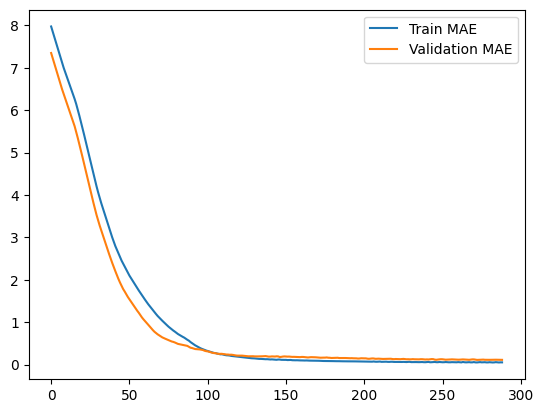

In [15]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [16]:
model.predict([[[2.37,7.53]]])

1/1 [==============================] - 0s 334ms/step


array([[12.7934675]], dtype=float32)

In [17]:
print(f"✅ Model trained on {len(X_train)} rows with min val MAE: {round(np.min(history.history['val_mae']), 2)}")


✅ Model trained on 105 rows with min val MAE: 0.11


In [18]:
history.params

{'verbose': 1, 'epochs': 1000, 'steps': 3}

In [19]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [3]:
from ..fertility.ml_logic.registry import load_model

ImportError: attempted relative import with no known parent package

In [4]:
app.state.model = load_model()

def predict(value1:float, value2:float):

    model = app.state.model
    assert model is not None

    pred = model.predict([[[value1, value2]]])
    print(pred)
    #return int(pred[0])
    return 'hello'

NameError: name 'load_model' is not defined

In [ ]:
model.predict()